In [1]:
import pandas as pd
import numpy as np
import random
random.seed(42)

import matplotlib.pyplot as plt

from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score
from matplotlib.font_manager import FontProperties

In [2]:
train_000 = pd.read_csv("train-00000.csv")
train_001 = pd.read_csv("train-00001.csv")

df = pd.concat([train_000, train_001])
df_arr = np.array(df.iloc[:, 2:]) # ground truth

In [3]:
popularity = df.iloc[:, 2:].sum(axis=0).sort_values(ascending=False)
popularity[:3]

❤️    21556
🔥     13590
✨     12237
dtype: int64

In [4]:
usage = sorted(Counter(df.iloc[:, 2:].sum(axis=1)).items())
usage[1:]

[(1, 116823),
 (2, 14704),
 (3, 1954),
 (4, 329),
 (5, 99),
 (6, 18),
 (7, 4),
 (8, 2)]

In [5]:
emoji2id = {emoji: i for i, emoji in enumerate(df.iloc[:, 2:].columns)}
id2emoji = {i: emoji for i, emoji in enumerate(df.iloc[:, 2:].columns)}

### Baselines

### RND All

In [6]:
rand_arr = np.zeros_like(df_arr)

for i in range(rand_arr.shape[0]):
    j = np.random.randint(rand_arr.shape[1])
    rand_arr[i, j] = True

rand_arr

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [7]:
print("Red Heart Precision:", precision_score(df_arr, rand_arr, average=None, zero_division=0)[emoji2id['❤️']])
print("Red Heart Recall:",    recall_score(df_arr, rand_arr, average=None, zero_division=0)[emoji2id['❤️']])
print("Red Heart F1 Score:",  f1_score(df_arr, rand_arr, average=None, zero_division=0)[emoji2id['❤️']])

Red Heart Precision: 0.16696873584050748
Red Heart Recall: 0.03419001670068658
Red Heart F1 Score: 0.05675779745860608


In [8]:
micro_f1 = f1_score(df_arr, rand_arr, average='micro')
macro_f1 = f1_score(df_arr, rand_arr, average='macro')

print("Micro F1 Score:", micro_f1, "Macro F1 Score:", macro_f1)

Micro F1 Score: 0.03508491869044066 Macro F1 Score: 0.027901239587799796


In [9]:
cosine_similarities = []

for i in range(df_arr.shape[0]):
    cosine_sim = cosine_similarity(df_arr[i].reshape(1, -1), rand_arr[i].reshape(1, -1))
    cosine_similarities.append(cosine_sim[0][0])

print("Cosine Similarity:", np.mean(cosine_similarities))

Cosine Similarity: 0.034778045608984356


### RND 15

In [10]:
popularity.index[:15]

Index(['❤️', '🔥', '✨', '👇', '🙏', '👉', '🙌', '🎉', '👏', '👀', '👍', '💪', '🎶', '🤷',
       '🎁'],
      dtype='object')

In [11]:
rand_arr = np.zeros_like(df_arr)

for i in range(rand_arr.shape[0]):
    j = emoji2id[np.random.choice(popularity.index[:15])]
    rand_arr[i, j] = True

rand_arr

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
print("Red Heart Precision:", precision_score(df_arr, rand_arr, average=None, zero_division=0)[emoji2id['❤️']])
print("Red Heart Recall:",    recall_score(df_arr, rand_arr, average=None, zero_division=0)[emoji2id['❤️']])
print("Red Heart F1 Score:",  f1_score(df_arr, rand_arr, average=None, zero_division=0)[emoji2id['❤️']])

Red Heart Precision: 0.1623653500897666
Red Heart Recall: 0.06712748190758953
Red Heart F1 Score: 0.09498490219246421


In [13]:
micro_f1 = f1_score(df_arr, rand_arr, average='micro')
macro_f1 = f1_score(df_arr, rand_arr, average='macro')

print("Micro F1 Score:", micro_f1, "Macro F1 Score:", macro_f1)

Micro F1 Score: 0.0615218040102999 Macro F1 Score: 0.03094346939553139


In [14]:
cosine_similarities = []

for i in range(df_arr.shape[0]):
    cosine_sim = cosine_similarity(df_arr[i].reshape(1, -1), rand_arr[i].reshape(1, -1))
    cosine_similarities.append(cosine_sim[0][0])

print("Cosine Similarity:", np.mean(cosine_similarities))

Cosine Similarity: 0.061268039726896574


### Top - 1

In [15]:
top_arr = np.zeros_like(df_arr)

j = emoji2id[popularity.index[0]]
top_arr[:, j] = True

top_arr

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [16]:
print("Red Heart Precision:", precision_score(df_arr, top_arr, average=None, zero_division=0)[emoji2id['❤️']])
print("Red Heart Recall:",    recall_score(df_arr, top_arr, average=None, zero_division=0)[emoji2id['❤️']])
print("Red Heart F1 Score:",  f1_score(df_arr, top_arr, average=None, zero_division=0)[emoji2id['❤️']])

Red Heart Precision: 0.1607433147902343
Red Heart Recall: 1.0
Red Heart F1 Score: 0.27696616942270874


In [17]:
micro_f1 = f1_score(df_arr, top_arr, average='micro')
macro_f1 = f1_score(df_arr, top_arr, average='macro')

print("Micro F1 Score:", micro_f1, "Macro F1 Score:", macro_f1)

Micro F1 Score: 0.1496123654384053 Macro F1 Score: 0.009232205647423625


In [18]:
cosine_similarities = []

for i in range(df_arr.shape[0]):
    cosine_sim = cosine_similarity(df_arr[i].reshape(1, -1), top_arr[i].reshape(1, -1))
    cosine_similarities.append(cosine_sim[0][0])

print("Cosine Similarity:", np.mean(cosine_similarities))

Cosine Similarity: 0.15079203033998928


### Top - 2

In [19]:
j = emoji2id[popularity.index[1]]
top_arr[:, j] = True

In [20]:
print("Red Heart Precision:", precision_score(df_arr, top_arr, average=None, zero_division=0)[emoji2id['❤️']])
print("Red Heart Recall:",    recall_score(df_arr, top_arr, average=None, zero_division=0)[emoji2id['❤️']])
print("Red Heart F1 Score:",  f1_score(df_arr, top_arr, average=None, zero_division=0)[emoji2id['❤️']])

Red Heart Precision: 0.1607433147902343
Red Heart Recall: 1.0
Red Heart F1 Score: 0.27696616942270874


In [21]:
micro_f1 = f1_score(df_arr, top_arr, average='micro')
macro_f1 = f1_score(df_arr, top_arr, average='macro')

print("Micro F1 Score:", micro_f1, "Macro F1 Score:", macro_f1)

Micro F1 Score: 0.16646615829110026 Macro F1 Score: 0.015366593427398167


In [22]:
cosine_similarities = []

for i in range(df_arr.shape[0]):
    cosine_sim = cosine_similarity(df_arr[i].reshape(1, -1), top_arr[i].reshape(1, -1))
    cosine_similarities.append(cosine_sim[0][0])

print("Cosine Similarity:", np.mean(cosine_similarities))

Cosine Similarity: 0.1712088917076672


In [23]:
font_path = 'TwitterColorEmoji-SVGinOT.ttf'
font_prop = FontProperties(fname=font_path, size=15)

C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


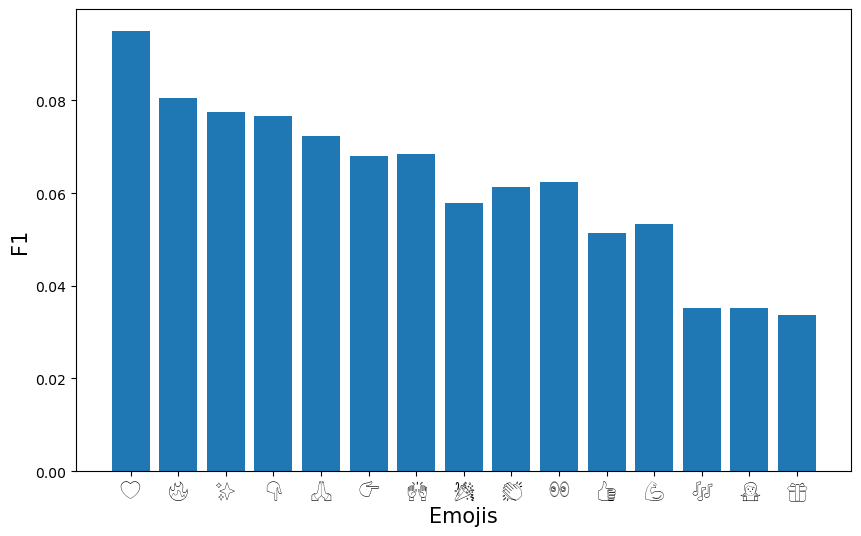

In [24]:
f_arr = f1_score(df_arr, rand_arr, average=None, zero_division=0)
x = popularity.index[:15]
y = [f_arr[emoji2id[_]] for _ in x]

plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.ylabel('F1', size=15)
plt.xlabel('Emojis', size=15)
plt.xticks(x, fontproperties=font_prop)
plt.show()